In [2]:
import os
from collections import defaultdict

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
if os.path.exists("../custom_style.mplstyle"):
    plt.style.use(["ggplot", "../custom_style.mplstyle"])

In [4]:
figs_save_dir = os.path.join("../figs", "eval_metrics")
os.makedirs(figs_save_dir, exist_ok=True)

In [5]:
WORK_DIR = os.getenv("WORK", "")
DATA_DIR = os.path.join(WORK_DIR, "data")

In [6]:
data_split = "final_skew40/test_zeroshot"

run_names_chattn = {
    "chattn + mlm + embedding": "pft_stand_rff_only_pretrained",
    "chattn + mlm": "pft_chattn_noembed_pretrained_correct",
    # "mlm + chattn": "pft_chattn_noemb_pretrained_chrope",
    # "chattn + embedding": "pft_fullyfeat_from_scratch",
    "chattn + embedding": "pft_fullyfeat_from_scratch_longer",
    "chattn": "pft_stand_chattn_noemb",
}

run_names_no_chattn = {
    "vanilla (wider) + embedding": "pft_emb_equal_param_univariate_from_scratch",
    "vanilla (wider)": "pft_noemb_equal_param_univariate_from_scratch",
    "vanilla (deeper)": "pft_equal_param_deeper_univariate_from_scratch_noemb",
    "vanilla + mlm + embedding": "pft_rff_univariate_pretrained",
    "vanilla + mlm": "pft_vanilla_pretrained_correct",
}

run_names = {
    **run_names_chattn,
    **run_names_no_chattn,
}

run_metrics_dirs_all_groups = {
    "chattn": {
        run_abbrv: os.path.join(
            "../eval_results",
            "patchtst",
            f"{run_name}-0",
            data_split,
        )
        for run_abbrv, run_name in run_names_chattn.items()
    },
    "no_chattn": {
        run_abbrv: os.path.join(
            "../eval_results",
            "patchtst",
            f"{run_name}-0",
            data_split,
        )
        for run_abbrv, run_name in run_names_no_chattn.items()
    },
}

In [7]:
run_metrics_dirs_all_groups["no_chattn"].keys()

dict_keys(['vanilla (wider) + embedding', 'vanilla (wider)', 'vanilla (deeper)', 'vanilla + mlm + embedding', 'vanilla + mlm'])

In [8]:
metrics_all = defaultdict(lambda: defaultdict(dict))
for run_group, run_metrics_dir_dict in run_metrics_dirs_all_groups.items():
    print(f"Run group: {run_group}")
    for run_abbrv, run_metrics_dir in run_metrics_dir_dict.items():
        run_abbrv = str(run_abbrv)
        print(f"{run_abbrv}: {run_metrics_dir}")
        for file in sorted(
            os.listdir(run_metrics_dir),
            key=lambda x: int(x.split("_pred")[1].split(".csv")[0]),
        ):
            if file.endswith(".csv"):
                prediction_length = int(file.split("_pred")[1].split(".csv")[0])
                # print(f"Prediction length: {prediction_length} for {run_abbrv}")
                with open(os.path.join(run_metrics_dir, file), "r") as f:
                    metrics = pd.read_csv(f).to_dict()
                    metrics_all[run_group][run_abbrv][prediction_length] = metrics

Run group: chattn
mlm + chattn + embedding: ../eval_results/patchtst/pft_stand_rff_only_pretrained-0/final_skew40/test_zeroshot
mlm + chattn: ../eval_results/patchtst/pft_chattn_noembed_pretrained_correct-0/final_skew40/test_zeroshot
chattn + embedding: ../eval_results/patchtst/pft_fullyfeat_from_scratch_longer-0/final_skew40/test_zeroshot
chattn: ../eval_results/patchtst/pft_stand_chattn_noemb-0/final_skew40/test_zeroshot
Run group: no_chattn
vanilla (wider) + embedding: ../eval_results/patchtst/pft_emb_equal_param_univariate_from_scratch-0/final_skew40/test_zeroshot
vanilla (wider): ../eval_results/patchtst/pft_noemb_equal_param_univariate_from_scratch-0/final_skew40/test_zeroshot
vanilla (deeper): ../eval_results/patchtst/pft_equal_param_deeper_univariate_from_scratch_noemb-0/final_skew40/test_zeroshot
vanilla + mlm + embedding: ../eval_results/patchtst/pft_rff_univariate_pretrained-0/final_skew40/test_zeroshot
vanilla + mlm: ../eval_results/patchtst/pft_vanilla_pretrained_correct-0

In [9]:
metrics_all["no_chattn"].keys()

dict_keys(['vanilla (wider) + embedding', 'vanilla (wider)', 'vanilla (deeper)', 'vanilla + mlm + embedding', 'vanilla + mlm'])

In [10]:
metrics_all.keys()

dict_keys(['chattn', 'no_chattn'])

In [11]:
unrolled_metrics_all_groups = defaultdict(lambda: defaultdict(dict))
for run_group, all_metrics_of_run_group in metrics_all.items():
    print(run_group)
    for run_abbrv, all_metrics_of_run_abbrv in all_metrics_of_run_group.items():
        print(run_abbrv)
        for run_name, metrics in all_metrics_of_run_abbrv.items():
            print(run_name)
            systems = metrics.pop("system")
            metrics_unrolled = {k: list(v.values()) for k, v in metrics.items()}
            print(metrics_unrolled.keys())
            unrolled_metrics_all_groups[run_group][run_abbrv][run_name] = (
                metrics_unrolled
            )

chattn
mlm + chattn + embedding
64
dict_keys(['mse', 'mae', 'smape', 'r2_score', 'spearman', 'system_dims'])
128
dict_keys(['mse', 'mae', 'smape', 'r2_score', 'spearman', 'system_dims'])
192
dict_keys(['mse', 'mae', 'smape', 'r2_score', 'spearman', 'system_dims'])
256
dict_keys(['mse', 'mae', 'smape', 'r2_score', 'spearman', 'system_dims'])
320
dict_keys(['mse', 'mae', 'smape', 'r2_score', 'spearman', 'system_dims'])
384
dict_keys(['mse', 'mae', 'smape', 'r2_score', 'spearman', 'system_dims'])
448
dict_keys(['mse', 'mae', 'smape', 'r2_score', 'spearman', 'system_dims'])
512
dict_keys(['mse', 'mae', 'smape', 'r2_score', 'spearman', 'system_dims'])
mlm + chattn
64
dict_keys(['mse', 'mae', 'smape', 'r2_score', 'spearman', 'system_dims'])
128
dict_keys(['mse', 'mae', 'smape', 'r2_score', 'spearman', 'system_dims'])
192
dict_keys(['mse', 'mae', 'smape', 'r2_score', 'spearman', 'system_dims'])
256
dict_keys(['mse', 'mae', 'smape', 'r2_score', 'spearman', 'system_dims'])
320
dict_keys(['mse',

In [12]:
unrolled_metrics_all_combined = {
    **unrolled_metrics_all_groups["chattn"],
    **unrolled_metrics_all_groups["no_chattn"],
}

In [13]:
unrolled_metrics_all_groups["no_chattn"].keys()

dict_keys(['vanilla (wider) + embedding', 'vanilla (wider)', 'vanilla (deeper)', 'vanilla + mlm + embedding', 'vanilla + mlm'])

In [14]:
def get_summary_metrics_dict(unrolled_metrics, metric_name):
    summary_metrics_dict = defaultdict(dict)
    for model_name, metrics_dict in unrolled_metrics.items():
        print(model_name)
        prediction_lengths = list(metrics_dict.keys())
        summary_metrics_dict[model_name]["prediction_lengths"] = prediction_lengths
        means = []
        medians = []
        stds = []
        for prediction_length in prediction_lengths:
            metric_val = metrics_dict[prediction_length][metric_name]
            means.append(np.nanmean(metric_val))
            medians.append(np.nanmedian(metric_val))
            stds.append(np.nanstd(metric_val))
        summary_metrics_dict[model_name]["means"] = means
        summary_metrics_dict[model_name]["medians"] = medians
        summary_metrics_dict[model_name]["stds"] = stds
    return summary_metrics_dict

In [15]:
def plot_metrics_by_prediction_length(
    metrics_dict, metric_name, show_std_envelope=False
):
    plt.figure(figsize=(5, 4))
    for model_name, metrics in metrics_dict.items():
        plt.plot(
            metrics["prediction_lengths"],
            metrics["medians"],
            marker="o",
            label=model_name,
        )
        std_envelope = np.array(metrics["stds"])
        if show_std_envelope:
            plt.fill_between(
                metrics["prediction_lengths"],
                metrics["means"] - std_envelope,
                metrics["means"] + std_envelope,
                alpha=0.2,
            )
    plt.legend(loc="lower right")
    plt.xlabel("Prediction Length")
    plt.title(metric_name, fontweight="bold")

In [16]:
run_metrics_dirs_all_groups.keys()

dict_keys(['chattn', 'no_chattn'])

In [17]:
metric_names_chosen = [
    "mse",
    "mae",
    "smape",
    "r2_score",
    "spearman",
]

In [18]:
all_metrics_dict = defaultdict(dict)

for run_group in run_metrics_dirs_all_groups.keys():
    all_metrics_dict[run_group] = {
        metrics_name: get_summary_metrics_dict(
            unrolled_metrics_all_groups[run_group], metrics_name
        )
        for metrics_name in metric_names_chosen
    }

mlm + chattn + embedding
mlm + chattn
chattn + embedding
chattn
mlm + chattn + embedding
mlm + chattn
chattn + embedding
chattn
mlm + chattn + embedding
mlm + chattn
chattn + embedding
chattn
mlm + chattn + embedding
mlm + chattn
chattn + embedding
chattn
mlm + chattn + embedding
mlm + chattn
chattn + embedding
chattn
vanilla (wider) + embedding
vanilla (wider)
vanilla (deeper)
vanilla + mlm + embedding
vanilla + mlm
vanilla (wider) + embedding
vanilla (wider)
vanilla (deeper)
vanilla + mlm + embedding
vanilla + mlm
vanilla (wider) + embedding
vanilla (wider)
vanilla (deeper)
vanilla + mlm + embedding
vanilla + mlm
vanilla (wider) + embedding
vanilla (wider)
vanilla (deeper)
vanilla + mlm + embedding
vanilla + mlm
vanilla (wider) + embedding
vanilla (wider)
vanilla (deeper)
vanilla + mlm + embedding
vanilla + mlm


In [19]:
colors = plt.cm.tab10.colors


def plot_all_metrics_by_prediction_length(
    all_metrics_dict: dict[str, dict[str, dict[str, list[float]]]],
    metric_names: list[str],
    runs_to_exclude: list[str],
    metrics_to_show_std_envelope: list[str],
    n_rows: int = 2,
    n_cols: int = 3,
    limit_num_prediction_lengths: int | None = None,
    title: str = "",
):
    num_metrics = len(metric_names)
    fig, axes = plt.subplots(
        nrows=n_rows, ncols=n_cols, figsize=(4 * n_cols, 4 * n_rows)
    )
    axes = axes.flatten()  # Flatten the axes array for easy iteration

    for i, (ax, metric_name) in enumerate(zip(axes, metric_names)):
        metrics_dict = all_metrics_dict[metric_name]
        for j, (model_name, metrics) in enumerate(metrics_dict.items()):
            if model_name in runs_to_exclude:
                continue
            # print(model_name)
            # print(metrics.keys())
            prediction_lengths = metrics["prediction_lengths"][
                :limit_num_prediction_lengths
            ]
            medians = metrics["medians"][:limit_num_prediction_lengths]
            means = metrics["means"][:limit_num_prediction_lengths]
            stds = metrics["stds"][:limit_num_prediction_lengths]
            ax.plot(
                prediction_lengths,
                medians,
                marker="o",
                label=model_name,
                color=colors[j],
                alpha=0.7,
            )
            std_envelope = np.array(stds)
            if metric_name in metrics_to_show_std_envelope:
                ax.fill_between(
                    prediction_lengths,
                    means - std_envelope,
                    means + std_envelope,
                    alpha=0.2,
                    color=colors[j],
                )
        if i == 0:
            ax.legend(loc="lower right", fontsize=10, frameon=True)
        ax.set_xlabel("Prediction Length")
        ax.set_xticks(prediction_lengths)
        name = metric_name.replace("_", " ")
        if name in ["mse", "mae", "rmse", "mape", "smape"]:
            name = name.upper()
        else:
            name = name.capitalize()
        ax.set_title(name, fontweight="bold")

    # Hide any unused subplots
    for ax in axes[num_metrics:]:
        ax.set_visible(False)

    if title:
        plt.suptitle(title, fontweight="bold", fontsize=16, y=1.05)
    plt.tight_layout()
    plt.show()

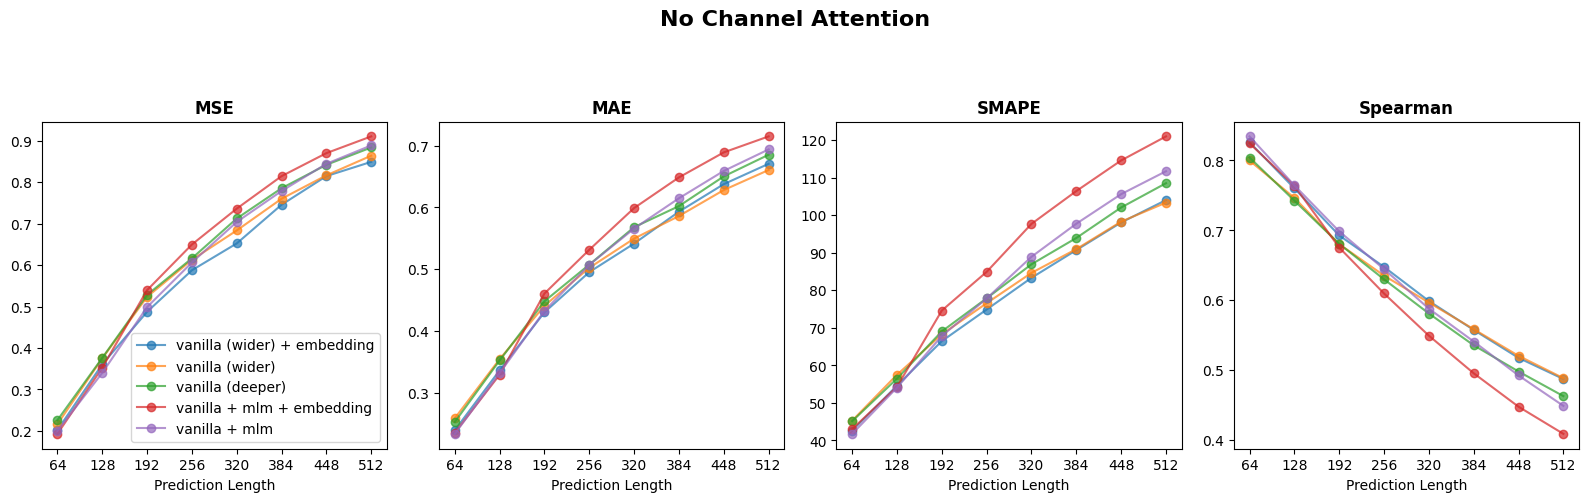

In [20]:
plot_all_metrics_by_prediction_length(
    all_metrics_dict["no_chattn"],
    ["mse", "mae", "smape", "spearman"],
    # metrics_to_show_std_envelope=["smape", "pearson", "spearman"],
    runs_to_exclude=[],
    metrics_to_show_std_envelope=[],
    limit_num_prediction_lengths=None,
    title="No Channel Attention",
    n_cols=4,
)

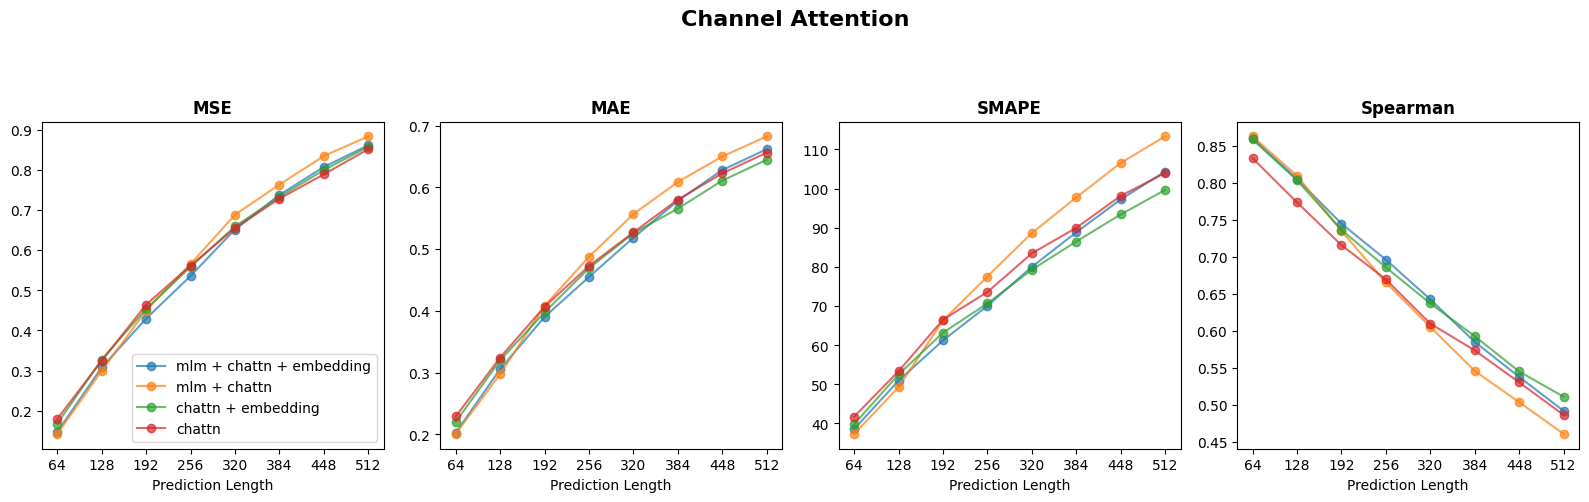

In [21]:
plot_all_metrics_by_prediction_length(
    all_metrics_dict["chattn"],
    ["mse", "mae", "smape", "spearman"],
    # metrics_to_show_std_envelope=["smape", "pearson", "spearman"],
    runs_to_exclude=[],
    metrics_to_show_std_envelope=[],
    limit_num_prediction_lengths=None,
    title="Channel Attention",
    n_cols=4,
)

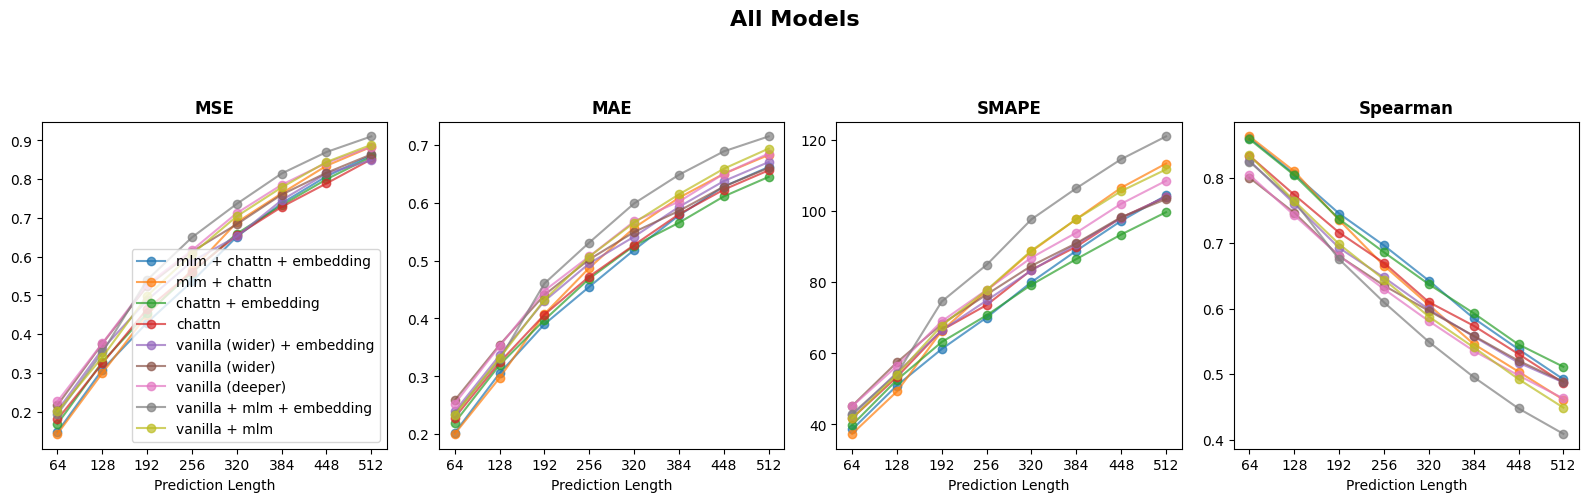

In [22]:
all_metrics_dict_all = {
    metrics_name: {
        **all_metrics_dict["chattn"][metrics_name],
        **all_metrics_dict["no_chattn"][metrics_name],
    }
    for metrics_name in metric_names_chosen
}
plot_all_metrics_by_prediction_length(
    all_metrics_dict_all,
    ["mse", "mae", "smape", "spearman"],
    # metrics_to_show_std_envelope=["smape", "pearson", "spearman"],
    runs_to_exclude=[],
    metrics_to_show_std_envelope=[],
    limit_num_prediction_lengths=None,
    title="All Models",
    n_cols=4,
)

In [26]:
from typing import Any

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


def make_aggregate_plot(
    unrolled_metrics: dict[str, dict[int, dict[str, list[float]]]],
    prediction_length: int,
    selected_run_names: list[str] | None = None,
    ylim: tuple[float, float] = (1e-5, 1e5),
    verbose: bool = False,
    metrics_to_include: list[str] = [],
    run_names_to_exclude: list[str] = [],
    use_rescaled_smape: bool = False,
    use_inv_spearman: bool = False,
    title: str = "Metrics",
    fig_kwargs: dict[str, Any] = {},
    legend_kwargs: dict[str, Any] = {},
    title_kwargs: dict[str, Any] = {},
    bar_kwargs: dict[str, Any] = {},
    plot_type: str = "box",  # New parameter: 'box' or 'bar'
    colors: list[str] | None = None,
    sort_by_metric: str | None = None,
    save_path: str | None = None,
):
    if colors is None:
        colors = plt.cm.tab10.colors
    # Extract metrics data for the given prediction_length and run_names
    if selected_run_names is None:
        selected_run_names = list(unrolled_metrics.keys())

    metrics_by_run_name = {
        run_name: unrolled_metrics[run_name][prediction_length]
        for run_name in selected_run_names
    }

    run_names = list(metrics_by_run_name.keys())
    metric_names = list(metrics_by_run_name[run_names[0]].keys())
    metric_names = [name for name in metric_names if name in metrics_to_include]
    run_names = [name for name in run_names if name not in run_names_to_exclude]

    print(f"run_names: {run_names}")
    print(f"metric_names: {metric_names}")

    # Create pretty titles for x-axis tick labels
    metric_names_title = []
    for name in metric_names:
        # Create pretty titles for x-axis tick labels
        if name in ["mse", "mae", "rmse", "mape"]:
            name = name.upper()
        elif name == "smape":
            name = "sMAPE"
        elif name == "spearman":
            name = "1 - Spearman"
        else:
            name = name.capitalize()
        metric_names_title.append(name)

    if fig_kwargs == {}:
        fig_kwargs = {"figsize": (6, 4)}
    plt.figure(**fig_kwargs)

    plot_data = []
    median_data = []
    for i, metric_name in enumerate(metric_names):
        metric_title = metric_names_title[i]
        for run_name in run_names:
            values = metrics_by_run_name[run_name][metric_name]
            if metric_name == "smape" and use_rescaled_smape:
                values = [x / 200 for x in values]
            if metric_name == "spearman" and use_inv_spearman:
                values = [1 - x for x in values]
            median_value = np.nanmedian(values)
            plot_data.extend([(metric_title, v, run_name) for v in values])
            median_data.append((metric_title, median_value, run_name))
            if verbose:
                print(f"{metric_title} - {run_name} median: {median_value}")

    # Create DataFrame for use with seaborn
    df = pd.DataFrame(plot_data, columns=["Metric", "Value", "Run"])

    # Set the order of metrics to match the original order in metric_names_title
    df["Metric"] = pd.Categorical(
        df["Metric"], categories=metric_names_title, ordered=True
    )

    # Sort runs based on the specified metric or overall median
    if sort_by_metric is not None:
        # Find the pretty title for the specified metric
        sort_metric_title = None
        for i, metric_name in enumerate(metric_names):
            if metric_name.lower() == sort_by_metric.lower():
                sort_metric_title = metric_names_title[i]
                break

        if sort_metric_title is None:
            print(
                f"Warning: Metric '{sort_by_metric}' not found. Using overall median for sorting."
            )
            # Calculate the median for each run (across all metrics)
            median_values = df.groupby("Run")["Value"].median().reset_index()
        else:
            # Filter data for the specific metric and calculate median
            metric_df = df[df["Metric"] == sort_metric_title]
            median_values = metric_df.groupby("Run")["Value"].median().reset_index()
    else:
        # Calculate the median for each run (across all metrics)
        median_values = df.groupby("Run")["Value"].median().reset_index()

    # Sort the medians
    sorted_medians = median_values.sort_values("Value")

    # Create a categorical type with the sorted run names to preserve the order
    df["Run"] = pd.Categorical(
        df["Run"], categories=sorted_medians["Run"].tolist(), ordered=True
    )

    # Sort the original dataframe
    df = df.sort_values("Run")

    # Choose plot type based on parameter
    if plot_type == "box":
        # Plot box plot
        sns.boxplot(
            data=df,
            x="Metric",
            y="Value",
            hue="Run",
            dodge=True,
            width=0.8,
            fliersize=0,  # Don't show outlier points
            palette=colors[: len(run_names)],
            medianprops={"linewidth": 2.5, "solid_capstyle": "butt"},
            saturation=0.6,
        )
    elif plot_type == "bar":
        if bar_kwargs == {}:
            bar_kwargs = {"estimator": "median"}
        # Plot bar plot
        sns.barplot(
            data=df,
            x="Metric",
            y="Value",
            hue="Run",
            palette=colors[: len(run_names)],
            saturation=0.6,
            **bar_kwargs,
        )
    else:
        raise ValueError(f"Unsupported plot_type: {plot_type}")

    plt.ylim(ylim)
    plt.ylabel("")
    plt.xlabel("")
    plt.xticks(fontweight="bold")
    plt.legend(**legend_kwargs)
    plt.title(title, fontweight="bold", **title_kwargs)
    plt.xticks(rotation=15)  # Optional: rotates x-tick labels for readability
    plt.tight_layout()
    if save_path is not None:
        plt.savefig(save_path, bbox_inches="tight")
    plt.show()

run_names: ['vanilla (wider) + embedding', 'vanilla (wider)', 'vanilla (deeper)', 'vanilla + mlm + embedding', 'vanilla + mlm']
metric_names: ['mse', 'mae', 'smape', 'spearman', 'system_dims']


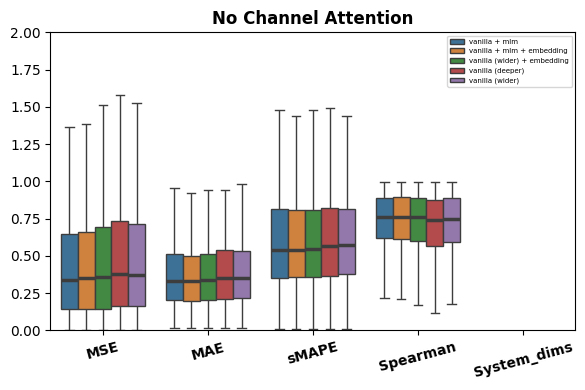

In [27]:
# make_aggregate_plot(
#     unrolled_metrics_all_groups["no_chattn"],
#     128,
#     selected_run_names=None,
#     ylim=(0, 2),
#     metrics_to_include=["mse", "mae", "smape", "spearman"],
#     use_rescaled_smape=True,
#     title="No Channel Attention",
#     legend_kwargs={"loc": "upper right", "fontsize": 5, "frameon": True},
# )

In [28]:
unrolled_metrics_all_groups["chattn"].keys()

dict_keys(['mlm + chattn + embedding', 'mlm + chattn', 'chattn + embedding', 'chattn'])

run_names: ['mlm + chattn + embedding', 'mlm + chattn', 'chattn + embedding', 'chattn']
metric_names: ['mse', 'mae', 'smape', 'spearman', 'system_dims']


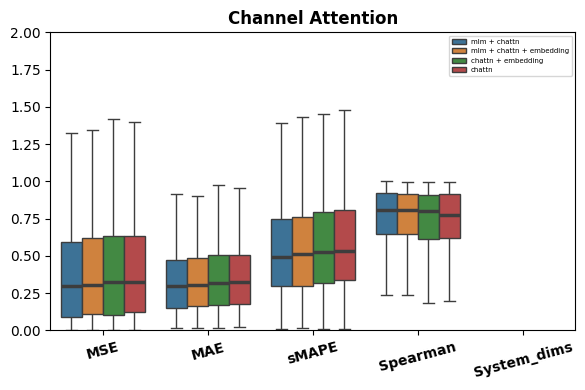

In [29]:
# make_aggregate_plot(
#     unrolled_metrics_all_groups["chattn"],
#     128,
#     selected_run_names=None,
#     ylim=(0, 2),
#     metrics_to_include=["mse", "mae", "smape", "spearman"],
#     use_rescaled_smape=True,
#     title="Channel Attention",
#     legend_kwargs={"loc": "upper right", "fontsize": 5, "frameon": True},
# )

In [30]:
unrolled_metrics_all_combined.keys()

dict_keys(['mlm + chattn + embedding', 'mlm + chattn', 'chattn + embedding', 'chattn', 'vanilla (wider) + embedding', 'vanilla (wider)', 'vanilla (deeper)', 'vanilla + mlm + embedding', 'vanilla + mlm'])

In [31]:
light_gray = (0.7, 0.7, 0.7)
bar_colors = list(plt.cm.tab20c.colors[:8]) + [light_gray]
print(len(bar_colors))

9


run_names: ['mlm + chattn + embedding', 'mlm + chattn', 'chattn + embedding', 'chattn', 'vanilla (wider) + embedding', 'vanilla (wider)', 'vanilla (deeper)', 'vanilla + mlm + embedding', 'vanilla + mlm']
metric_names: ['mse', 'mae', 'smape', 'spearman', 'system_dims']


/tmp/ipykernel_3128895/993153195.py:132: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agg_df = df.groupby(["Metric", "Run"])["Value"].median().reset_index()


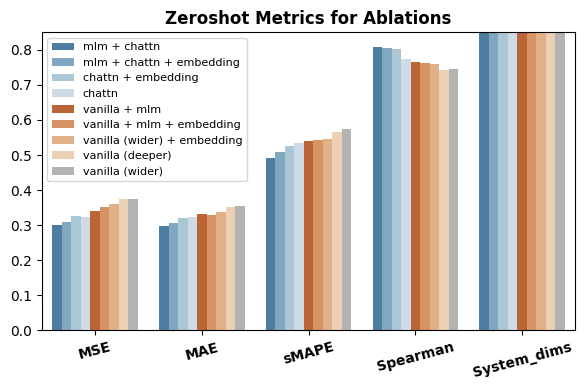

In [32]:
make_aggregate_plot(
    unrolled_metrics_all_combined,
    128,
    selected_run_names=None,
    ylim=(0, 0.45),
    metrics_to_include=["mse", "mae", "smape", "spearman"],
    use_rescaled_smape=True,
    use_inv_spearman=True,
    title="Zeroshot Metrics for Ablations",
    legend_kwargs={"loc": "upper right", "fontsize": 5.5, "frameon": True},
    plot_type="bar",
    bar_kwargs={
        "estimator": "median",
        "errorbar": ("ci", 95),
        # "errorbar": ("se", 2),
        "err_kws": {"linewidth": 0.8, "alpha": 0.8},
    },
    colors=bar_colors,
    sort_by_metric="smape",
    save_path="ablations_pred128.pdf",
)

In [ ]:
make_aggregate_plot(
    unrolled_metrics_all_combined,
    128,
    selected_run_names=None,
    ylim=(0, 1),
    metrics_to_include=["mse", "mae", "smape", "spearman"],
    use_rescaled_smape=True,
    use_inv_spearman=True,
    title="Zeroshot Metrics for Ablations",
    legend_kwargs={
        "loc": "upper right",
        "fontsize": 6,
        "frameon": True,
        "framealpha": 1.0,
    },
    plot_type="box",
    colors=bar_colors,
    sort_by_metric="smape",
    save_path=None,
)

In [ ]:
# make_aggregate_plot(
#     unrolled_metrics_all_combined,
#     128,
#     selected_run_names=None,
#     ylim=(0, 150),
#     metrics_to_include=["smape"],
#     use_rescaled_smape=False,
#     title="Zeroshot Metrics for Ablations",
#     fig_kwargs={"figsize": (2, 4)},
#     legend_kwargs={"loc": "lower right", "fontsize": 3, "frameon": True},
#     title_kwargs={"fontsize": 8},
#     plot_type="box",
#     colors=bar_colors,
#     sort_by_metric="smape",
#     save_path=None,
# )